In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [467]:
boston = pd.read_csv("Boston_Housing.csv")
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


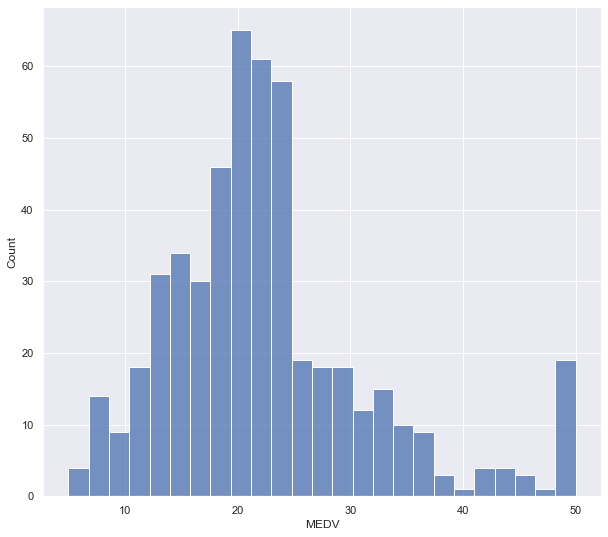

In [468]:
#plotting distribution graph of target 'MEDV' by using histplot from seaborn library
sns.set(rc={'figure.figsize':(10 ,9)})
sns.histplot(boston['MEDV'], bins = 25)
plt.show()

<AxesSubplot:>

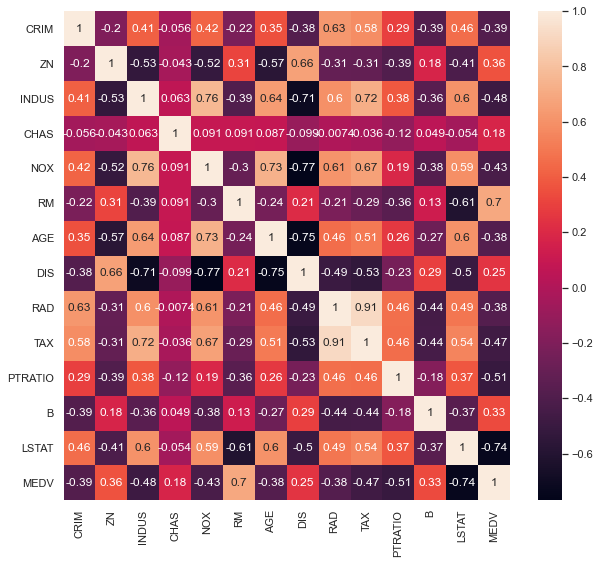

In [469]:
#To find the correlation matrix
#white colour means 1 , so closer to 1 i.e white means stronger correlation between two features 

corr_mat = boston.corr().round(10)
sns.heatmap(data = corr_mat , annot = True)

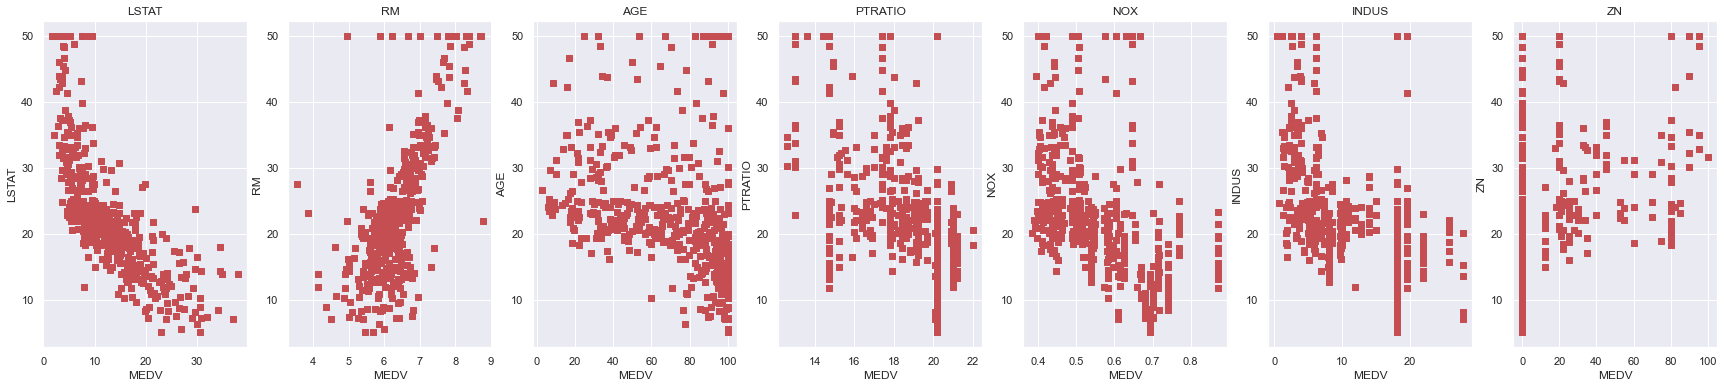

In [470]:
#If highly correlated we should not select those features for training the model
#Here we see that since RM and ZN is strongly correlated to target MEDV and hence their plot shows that 
#cost increases with increase in MEDV

plt.figure(figsize = (30,6))

features = ['LSTAT', 'RM' , 'AGE' , 'PTRATIO' , 'NOX' , 'INDUS' , 'ZN']   
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='s' , c = 'r')
    plt.title(col)
    plt.ylabel(col)
    plt.xlabel('MEDV')

In [471]:
#Feature Normalize
def featureNormalize( X ):
    X_norm = X
    mu = np.zeros((1, np.size(X,1)),dtype=float)
    sigma = np.zeros((1, np.size(X,1)),dtype=float)

    mu=np.mean(X_norm)
    sigma=np.std(X_norm)
    X_norm=(X_norm-mu)/sigma
    return X_norm,mu,sigma

In [472]:
#For our first test we take only one feature

X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
Y = boston['MEDV']

#Feature normalizing 
(X ,mu ,sigma) = featureNormalize(X)

m = boston.shape[0]
X = np.concatenate((np.ones((m,1),dtype=float),X),axis=1)
Y = Y.to_numpy()

print("The housing set size: " , X.shape)

The housing set size:  (506, 2)


In [473]:
#We train the model with 80% of the samples and test with the remaining 20%. 

#Training set
X_train = X[0 : 404]
Y_train = Y[0:404]

#Test set
X_test = X[404 : ]
Y_test = Y[404 : ]
print("Training set size: " , X_train.shape)
print("Test set size: " , X_test.shape)


Training set size:  (404, 2)
Test set size:  (102, 2)


In [474]:
#We define the learning rate alpha = 0.01
#The number of iterations = 2000
alpha = 0.01
num_iters = 2000

theta = np.zeros((X.shape[1], 1),dtype=float)

#Cost Function
def computeCost(X , y , theta):
    m = len(y)
    J = 0
    h = X @ theta
    J = (1/(2*m))*np.sum((h-y)**2)
    
    return J

#Gradient Descent
def gradientDescent(X , y , theta , alpha , num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1),dtype=float)

    for iter in range(num_iters):
        h = X @ theta
        theta = theta - (alpha/m)*(X.T)@(h-y)
        J_history[iter] = computeCost(X, y, theta)
        
    return theta , J_history

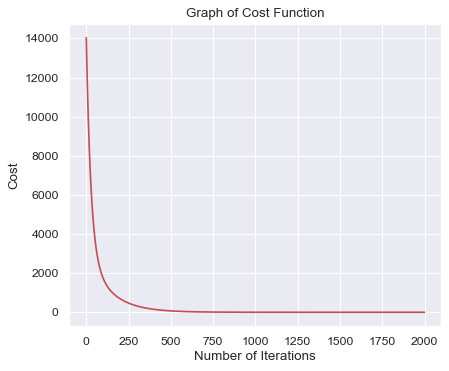

In [475]:
( theta , J_res ) = gradientDescent(X_test , Y_test , theta, alpha, num_iters)

plt.figure(figsize=(6 , 5) , dpi = 80)
plt.plot(range(len(J_res)), J_res , 'r')
plt.title("Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()


In [476]:
#We include 6 more features
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['AGE'] , boston['PTRATIO'] , boston['NOX'] , boston['INDUS'] , boston['RM'] , boston['ZN']], 
                                                            columns = ['LSTAT', 'AGE' , 'PTRATIO' , 'NOX' , 'INDUS' , 'RM' , 'ZN'])
Y = boston['MEDV']
(X ,mu ,sigma) = featureNormalize(X)

m = boston.shape[0]
X = np.concatenate((np.ones((m,1),dtype=float),X),axis=1)
Y = Y.to_numpy()

print("The housing set size: " , X.shape)

The housing set size:  (506, 8)


In [477]:
#We train the model with 80% of the samples and test with the remaining 20%. 

#Training set
X_train = X[0 : 404]
Y_train = Y[0:404]

#Test set
X_test = X[404 : ]
Y_test = Y[404 : ]
print("Training set size: " , X_train.shape)
print("Test set size: " , X_test.shape)

theta = np.zeros((X.shape[1], 1),dtype=float)

Training set size:  (404, 8)
Test set size:  (102, 8)


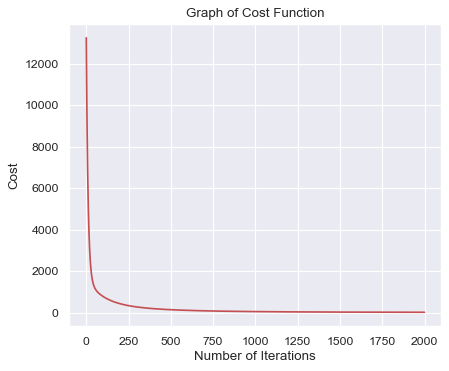

In [478]:
( theta , J_res ) = gradientDescent(X_test, Y_test , theta, alpha, num_iters)

plt.figure(figsize=(6 , 5) , dpi = 80)
plt.plot(range(len(J_res)), J_res , 'r')
plt.title("Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [479]:
#From the above two graphs we see that as we include more features for predicting the house price ,
                                                    #the cost almost decreases by half.
                   